# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [196]:
# Import the appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np

# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")

In [197]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [198]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [199]:
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [200]:
north_df.shape

(245, 15)

In [201]:
south_df.shape

(314, 15)

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [202]:
# Put your EDA code here
north_df["Rep ID"].nunique()

### Rep count in north branch is 9. 

9

In [203]:
south_df["Rep ID"].nunique()
#Rep Count in South call center is 11

11

In [204]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [205]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [206]:
north_df["Time Block"].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [207]:
south_df["Time Block"].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [208]:
# Clean your data here

north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [209]:
## 2 In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
north_df["Sale"]=north_df["Sale"].str.replace("YES ","YES")
north_df["Sale"].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [210]:
## Are there duplicates in the two data sets? If there are, how did you handle them?
# first droping the "unnamed column" as it will be make difference while calculating duplicates


duplicates_north_df=north_df[north_df.duplicated(keep=False)]
duplicates_north_df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [211]:
## Checking for any duplicates in south call center 


duplicates_south_df=south_df[south_df.duplicated(keep=False)]
duplicates_south_df

## Below are duplicated rows

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [212]:
#4 Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
# Ans: I see the column name "Unamed:0" as unnecessary so preferred to drop that column 
north_df=north_df.drop("Unnamed: 0",axis=1)
south_df=south_df.drop("Unnamed: 0",axis=1)

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [213]:

df=north_df.append([south_df])
df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,559.000000,559.000000,559.000000,559.000000,208.000000,559.000000,559.0
mean,0.028623,0.019678,10.025045,1.912343,3.019231,3.028623,1.0
std,0.166893,0.139016,1.405091,0.821644,1.365417,0.831225,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [214]:
df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [215]:
df.tail()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [216]:
# Manipulate data here

#Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest 
#number of calls
df.groupby(["Branch","Rep ID"]).aggregate({"Calls":"sum"}).sort_values(by=['Calls'])

Calls
Branch Rep ID       
South  Alice      20
North  Amanda     23
       Andy       23
       Cam        24
       Xander     24
South  Sharon     25
       Susan      26
North  Joe        26
South  Josh       26
       Karl       28
North  Duke       29
       Todd       29
South  George     29
       Kate       29
North  Lilly      30
South  Helga      31
       Sandy      32
       Randy      33
       Eric       35
North  Brent      37

In [217]:
#The average call abandonment rate is a KPI when it comes to determining call center efficiency.
#As you may recall, abandoned calls are calls where the customer hangs up due to long call times. 
#What is the average call abandonment rate for each branch and the whole company? 
#Do any of these fall out of the optimal range of 2-5%?


## North Call center
percentage_AbandonmentRate_North=north_df["Abandoned"].mean()*100
print("Percentage of call abandonment rate north call center ",percentage_AbandonmentRate_North,"%")

## South Call Center
percentage_AbandonmentRate_South=south_df["Abandoned"].mean()*100
print("Percentage of call abandonment rate south call center ",percentage_AbandonmentRate_South,"%")

## Whole company

percentage_AbandonmentRate_Company=df["Abandoned"].mean()*100
print("Percentage of call abandonment rate Whole company ",percentage_AbandonmentRate_Company,"%")


Percentage of call abandonment rate north call center  2.857142857142857 %
Percentage of call abandonment rate south call center  1.2738853503184715 %
Percentage of call abandonment rate Whole company  1.9677996422182469 %


In [218]:
#Service level is another KPI when it comes to measuring call center efficiency. 
#Service level is the percentage of calls answered within a specific number of seconds.
#In the case of your employer, their ideal time frame is 2 seconds. 
#What is the percentage of calls answered within 2 seconds for each company and the entire company?

north_df["Incoming Wait Time"].value_counts().sort_index(ascending=True)



1.0    17
2.0    16
3.0    12
4.0    20
5.0    17
Name: Incoming Wait Time, dtype: int64

In [219]:
#Service level is the percentage of calls answered within a specific number of seconds. 

# Total Number of calls in north call center
TotalNumberOfCallsNorth=north_df['Calls'].count()

#Total number of calls 1 second calls are 17 and total number 2 second calls are 16 from above value_counts(),so in total 17+16=33

TotalNumberIfCallswithin2SecNorth=33



PercentageCallsNorth=round((TotalNumberIfCallswithin2SecNorth/TotalNumberOfCallsNorth)*100)
print("Percentage of calls answered within 2 seconds for North Call center",PercentageCallsNorth,"%")

Percentage of calls answered within 2 seconds for North Call center 13 %


In [220]:
## South Call center
south_df["Incoming Wait Time"].value_counts().sort_index(ascending=True)

1.0    20
2.0    28
3.0    29
4.0    30
5.0    19
Name: Incoming Wait Time, dtype: int64

In [221]:
#Service level is the percentage of calls answered within a specific number of seconds.


TotalNumberOfCallsSouth=south_df['Calls'].count()

# Total number of calls 1 second calls are 20 and total number 2 second calls are 28 from above value_counts(),so in total 20+28=48

TotalNumberIfCallswithin2SecSouth=48



PercentageCallsSouth=round((TotalNumberIfCallswithin2SecSouth/TotalNumberOfCallsSouth)*100)
print("Percentage of calls answered within 2 seconds for South Call center",PercentageCallsSouth,"%")


Percentage of calls answered within 2 seconds for South Call center 15 %


In [222]:
## Entire Company
df["Incoming Wait Time"].value_counts().sort_index(ascending=True)

1.0    37
2.0    44
3.0    41
4.0    50
5.0    36
Name: Incoming Wait Time, dtype: int64

In [223]:
#Service level is the percentage of calls answered within a specific number of seconds.

TotalNumberOfCallsCompany=df['Calls'].count()

# Total number of calls 1 second calls are 37 and total number 2 second calls are 44 from above value_counts(),so in total 37+44=81
TotalNumberIfCallswithin2SecCompany=81



PercentageCallsCompany=round((TotalNumberIfCallswithin2SecCompany/TotalNumberOfCallsCompany)*100)
print("Percentage of calls answered within 2 seconds for Entire Company ",PercentageCallsCompany,"%")


Percentage of calls answered within 2 seconds for Entire Company  14 %


In [224]:
# 4 For each branch and the entire company, what is the average speed of answer?

north_df["Incoming Wait Time"].mean()

3.048780487804878

In [225]:
# South call center average speed of answer
south_df["Incoming Wait Time"].mean()

3.0

In [226]:
# Entire company average speed of answer
df["Incoming Wait Time"].mean()

3.019230769230769

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [227]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
print(abandonment_rates)    

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


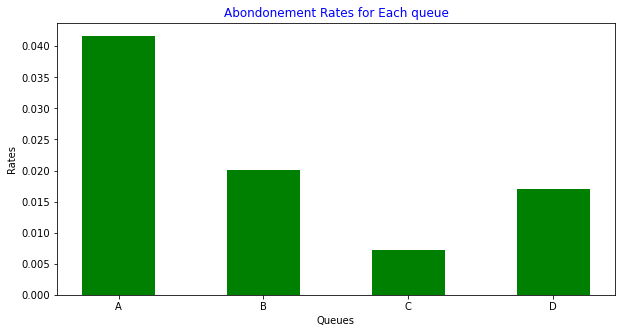

In [228]:
queue=list(abandonment_rates.keys())
rates=list(abandonment_rates.values())
fig = plt.figure(figsize = (10, 5))

plt.title('Abondonement Rates for Each queue',color='blue')
#df['year'].value_counts()[:20].plot(kind='bar',color='blue')

plt.bar(queue,rates,color='green',width=.5)
plt.xlabel("Queues")
plt.ylabel("Rates")

plt.show()

In [229]:
# 2 Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_callsNorth = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_repsNorth = quick_callsNorth[["Rep ID", "Calls"]]
quick_statsNorth = quick_repsNorth.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_inNorth = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_callsNorth = total_calls_inNorth[["Rep ID", "Calls"]]     
total_statsNorth = rep_callsNorth.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_levelNorth = pd.merge(quick_statsNorth, total_statsNorth, on="Rep ID")


# Create Percentage Column in Table 3
service_levelNorth["Service Level %"] = service_levelNorth["Calls_x"]/service_levelNorth["Calls_y"] *100


In [230]:
# South

south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_callsSouth = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_repsSouth = quick_callsSouth[["Rep ID", "Calls"]]
quick_statsSouth = quick_repsSouth.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_inSouth = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_callsSouth = total_calls_inSouth[["Rep ID", "Calls"]]     
total_statsSouth = rep_callsSouth.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_levelSouth = pd.merge(quick_statsSouth, total_statsSouth, on="Rep ID")

# Create Percentage Column in Table 3
service_levelSouth["Service Level %"] = service_levelSouth["Calls_x"]/service_levelSouth["Calls_y"]*100 


In [231]:
serviceLevelCompany=service_levelNorth.append(service_levelSouth)


In [232]:
averageSpeedAnswer=df.groupby("Rep ID").aggregate(AverageSpeedAnswer=("Incoming Wait Time","mean"))

serviceLevel_averageSpeedAnswer=serviceLevelCompany.join(averageSpeedAnswer)

serviceLevel_averageSpeedAnswer.reset_index(inplace=True)


<AxesSubplot:xlabel='Rep ID'>

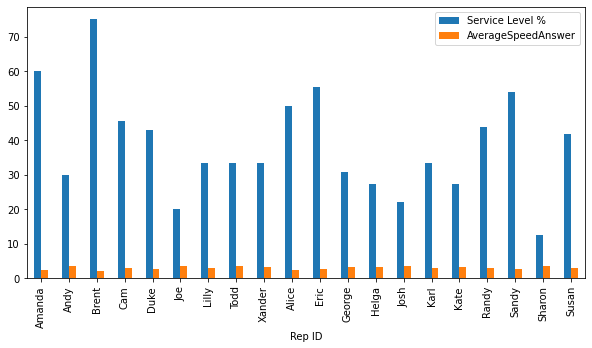

In [233]:

serviceLevel_averageSpeedAnswer.plot(x="Rep ID",y=["Service Level %","AverageSpeedAnswer"],kind="bar",figsize=(10,5))

In [234]:
#3 For each type of call purpose, how many calls are outgoing vs. incoming? Another way to do below 
#df.groupby(["Call Purpose","Incoming or Outgoing"]).aggregate({"Calls":"count"})


In [235]:

purpose_group = df.groupby("Call Purpose")
purpose_group.first()
purpose_counts =purpose_group["Incoming or Outgoing"].value_counts(ascending=True)
purpose_counts
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
call_purpose=["Complaint","Sales Support","Product Support"]



# complaints dont have any outgoing calls. So inserting 'Outgoing':0 KeyValue pair to complaints 

complaints["Outgoing"]=0




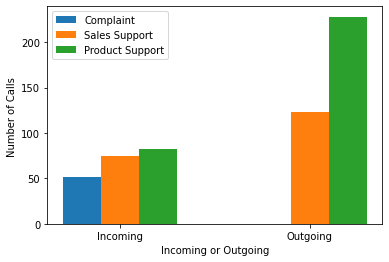

In [236]:
X=np.arange(len(sales_support))
plt.bar(X-0.2,complaints.values(),width=0.2)
plt.bar(X,sales_support.values(),width=0.2)
plt.bar(X+0.2,product_support.values(),width=0.2)
plt.xticks(X,sales_support.keys())
plt.xlabel("Incoming or Outgoing")
plt.ylabel("Number of Calls ")
plt.legend(call_purpose)

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

What is the average abandonment rate per queue?
I prefered Bar chart as it will be easy to compare two values

What is the service level and average speed of answer per each rep?
I prefer multiple bar chart so that it will be clearly point to each reps Service level and average speed which makes easy for comparison

#For each type of call purpose, how many calls are outgoing vs. incoming? Another way to do below 
I used mulitiple bar chart to compare the values of different call purpose vs incoming/outgoing

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

Call Abandonment  rate for North call center is 2.8% and South call center is 1.2 %
Service level for North call center 13% and South Call center is 15 %
Average Soeed of answer North call center is 2.96 and South call center is 3.07
Comparing above values South call center have low abandonment rate also South call center have higher Service level rate and average speed of answer rate from which I see South call center is operating more efficient than North


Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?


Number of Rep in North Call center are 9 and total calls handled by North call center is 245. Average calls handled by each Rep in North call center is 27.2

Number of Rep in South Call center are 11 and total calls handled by South call center is 314. Average calls handled by each Rep in South call center is 28.5.

Average calls handled by each Rep in both center is not having much differenece. But since North Call center is have less Reps and  they have low Service level and average speed of answer adding more employees to North call center will make center to perform more better and increased KPI values.

Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

After exploring th datasets I feel Customer Review for Each Reps are much important in calculating the performance. I will suggest to add Customer Review Ratings





## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [237]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
